# STA365
Homework 3

---

### Question 1

The *Gibbs sampler* in class for the prior $p(\theta,\tau) \propto 1$ was created by alternatingly sampling from the *full conditional* $p(\theta|\tau,\textbf{x})$ *normal* and  $p(\tau|\theta,\textbf{x})$ *gamma* distributions. Create this *Gibbs sampler* so your code can be used for the sample `x = stats.norm(loc=m, scale=s).rvs(size=n)` for any arbitrary `n`, `m`, and `s`.

*Use the code below or your own code to <u>provide a demonstration of Bayesian inference<u> for this data and model specification.*


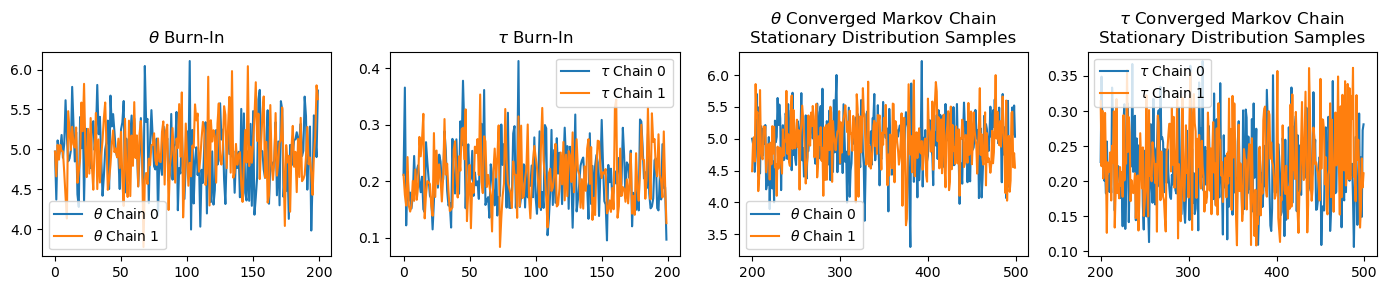

In [6]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Data generation
n = 30
m = 5  # true mean
s = 2  # true standard deviation
x = stats.norm(loc=m, scale=s).rvs(size=n)

# Gibbs sampler parameters
C, G = 2, 10000  # Chains, Gibbs samples
theta = np.zeros((C, G))
tau = np.zeros((C, G))

# Initialization
theta[:, 0] = np.mean(x)
tau[:, 0] = 1 / np.var(x)

# Hyperparameters for full conditionals
a_prior = 1  # Shape parameter for Gamma prior (if needed)
b_prior = 1  # Rate parameter for Gamma prior (if needed)

for c in range(C):
    for g in range(1, G):
        # Sample theta from Normal
        tau_inv = 1 / tau[c, g - 1]
        theta_post_var = tau_inv / n
        theta_post_mean = np.mean(x)
        theta[c, g] = stats.norm(loc=theta_post_mean, scale=np.sqrt(theta_post_var)).rvs()

        # Sample tau from Gamma
        shape = a_prior + n / 2
        scale = 1 / (b_prior + np.sum((x - theta[c, g]) ** 2) / 2)
        tau[c, g] = stats.gamma(a=shape, scale=scale).rvs()

# Plotting
fig, ax = plt.subplots(1, 4, figsize=(14, 3))
burn = 200  # Burn-in period
demo = 500  # Number of samples to demonstrate

for c in range(C):
    ax[0].plot(theta[c, :burn], label=f"$\\theta$ Chain {c}")
    ax[1].plot(tau[c, :burn], label=f"$\\tau$ Chain {c}")
    ax[2].plot(np.arange(burn, demo, dtype=int), theta[c, burn:demo], label=f"$\\theta$ Chain {c}")
    ax[3].plot(np.arange(burn, demo, dtype=int), tau[c, burn:demo], label=f"$\\tau$ Chain {c}")

ax[0].set_title("$\\theta$ Burn-In")
ax[1].set_title("$\\tau$ Burn-In")
ax[2].set_title("$\\theta$ Converged Markov Chain\nStationary Distribution Samples")
ax[3].set_title("$\\tau$ Converged Markov Chain\nStationary Distribution Samples")
for a in ax:
    a.legend()

plt.tight_layout()
plt.show()


In [9]:
np.quantile(theta, (0.025, 0.975)) #credible interval for bayesian inference

array([4.17209353, 5.77153767])

In [11]:
np.quantile(tau, (0.025, 0.975)) #credible interval for bayesian inference

array([0.20695558, 0.61829898])

Based on the credible interval obtained, we have 95% belief that the actual theta lies in the interval 4.172 and 5.77153 and 95% belief that the actual tau lies in the interval 0.20696 and 0.618299.

---
### Question 2

Derive the *full conditional distributions* $p(\tau|\theta, \mathbf{x})$ and $p(\theta|\tau, \mathbf{x})$ if $p(\theta)$ is $N(\theta_0, \tau^2_0)$ and $p(\tau) \propto \tau^{\frac{\alpha}{2}-1} e^{- \frac{\lambda}{2} \tau}$. 

*Explain how to equate $\alpha$ and $\lambda$ with controlling the amount and nature of information the prior contributes to the posterior. How can we interpret these as controlling a "number of data points" contributed by the prior relative to the number of data points contributed to the posterior through the likelihoood?*

Create an updated version of the *Gibbs sampler* for $N(\theta_0, \tau^2_0)$ and $\textrm{gamma}(\textrm{shape}=\frac{\alpha}{2}, \textrm{rate}=\frac{\lambda}{2})$ priors for $p(\theta)$ and $p(\tau)$ respectively. 

*Demonstrate how changing the prior hyperparameters influences the posterior relative to the sample and the likelihood.*

a. The full conditional [posterior distribution] of $p(\tau|\theta, \mathbf{x})$ if $p(\theta)$ is $N(\theta_0, \tau^2_0)$ and $p(\tau) \propto \tau^{\frac{\alpha}{2}-1} e^{- \frac{\lambda}{2} \tau}$. 


Assume the likelihood follows a Normal distribution, ie $p(x | \theta, \tau) = \prod_{i=1}^n N(x_i | \theta, \tau^{-1})= (\frac{\tau}{2\pi})^{n/2}e^{(\frac{\tau}{2}\Sigma_{i=1}^n (x_i-\theta)^2)}$, then
$$\begin{align*}
p(\tau|\theta, \mathbf{x}) &\propto{} f(\mathbf{x}|\theta)p(\tau|\theta)=p(\mathbf{x}|\theta)p(\tau)\\
&\propto{} (\frac{\tau}{2\pi})^{n/2}e^{(\frac{\tau}{2}\Sigma_{i=1}^n (x_i-\theta)^2)} \times \tau^{\frac{\alpha}{2}-1} e^{- \frac{\lambda}{2} \tau} \\
&\propto{} \tau^{\frac{n}{2} + \frac{\alpha}{2}-1} e^{\tau(\frac{1}{2}\Sigma_{i=1}^n (x_i-\theta)^2 - \frac{\lambda}{2})} 
\end{align*}
$$
Hence, the full conditional distribution for $p(\tau|\theta, \mathbf{x})$ is a Gamma distribution with parameters   $Gamma(\frac{\alpha + n}{2}, \frac{\Sigma_{i=1}^n (x_i-\theta)^2 - \lambda}{2})$

b. The full conditional [posterior distribution] of $p(\theta|\tau, \mathbf{x})$ if $p(\theta)$ is $N(\theta_0, \tau^2_0)$ and $p(\tau) \propto \tau^{\frac{\alpha}{2}-1} e^{- \frac{\lambda}{2} \tau}$. 

Assume the likelihood follows a Normal distribution, ie $p(x | \theta, \tau) = \prod_{i=1}^n N(x_i | \theta, \tau^{-1})= (\frac{\tau}{2\pi})^{n/2}e^{(\frac{\tau}{2}\Sigma_{i=1}^n (x_i-\theta)^2)}$, then
$$\begin{align*}
p(\theta|\tau, \mathbf{x}) &\propto{} f(\mathbf{x}|\tau)p(\theta|\tau)=f(\mathbf{x}|\tau)p(\theta)\\
&\propto{} (\frac{\tau}{2\pi})^{n/2}e^{(\frac{\tau}{2}\Sigma_{i=1}^n (x_i-\theta)^2)} \times  \frac{1}{\sqrt{2\pi\tau_0^2}}e^{(-\frac{(\theta - \theta_0)^2}{2\tau_0^2})}\\
&\propto{} e^{(- \frac{\tau_n}{2} (n\theta^2 - 2\bar{x}\theta)} \times e^{(- \frac{\tau_0}{2}(\theta^2 - 2\theta\theta_0))} \\
&\propto e^{-\frac{1}{2} \text{[}n\tau\theta^2 - 2\tau_n\hat{x}\theta + \tau_0\theta^2 - 2\theta\theta_0\tau_0\text{]}} \\
&\propto e^{- \frac{n\tau + \tau_0}{2}\text{[}\theta^2 - 2\theta \tilde{\theta}\text{]}} 
\end{align*}
$$

Hence, the full conditional distribution for $p(\theta|\tau, \mathbf{x})$ is a Normal distribution with $N(\tilde{\theta}, \tilde{\tau}^2)$, where $\tilde{\theta}=\frac{\tau_0^{-2}\theta_0 + n\tau\hat{x}}{\tau_0^{-2} + n\tau}$ and $\tilde{\tau}^2 = \frac{1}{\tau_0^{-2}+n\tau}$

c. Interpreting $\alpha$ and $\lambda$

The prior $p(\tau)$ introduces points to influence the posterior $p(\tau | \theta, \mathbf{x})$. Since the prior $p(\theta)$ does not have the parameters $\alpha$ and $\lambda$, $p(\theta | \tau, \mathbf{x})$. 

For the case of $p(\tau | \theta, \mathbf{x})$, as $\alpha$ increases, we can say that we have a more informative prior which makes the posterior less flexible. This happens as a result of the mean of $\tau$ increasing since the weight of $\alpha$ assigns a higher precision value.

As for $\lambda$, a higher $\lambda$ reduces the expected value of $\tau$ and increases the posterior variance. It shrinks $\tau$ towards a smaller value with the prior favoring a larger variance.

d. Updating the Gibbs sample

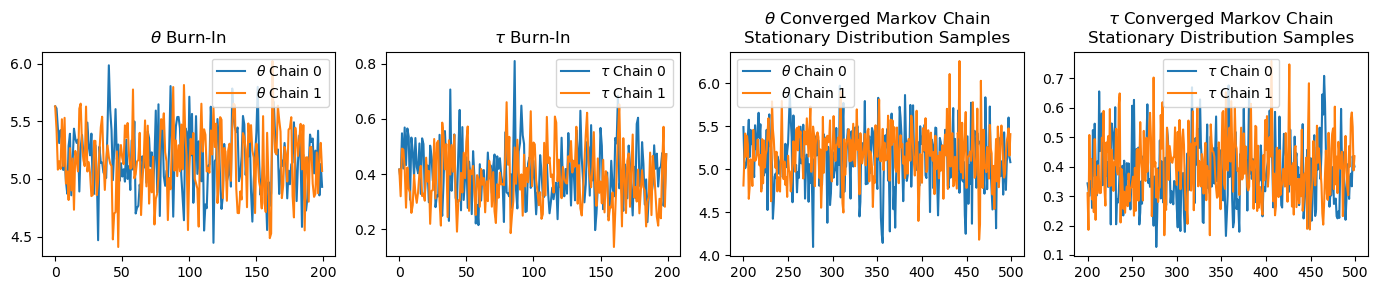

In [10]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Data generation
n = 30
m = 5  # true mean
s = 2  # true standard deviation
x = stats.norm(loc=m, scale=s).rvs(size=n)

# Prior hyperparameters
theta_0 = 0  # Prior mean
tau_0 = 1  # Prior precision (1/variance)
alpha = 2  # Prior shape for tau
lambda_ = 2  # Prior rate for tau

# Gibbs sampler parameters
C, G = 2, 10000  # Chains, Gibbs samples
theta = np.zeros((C, G))
tau = np.zeros((C, G))

# Initialization
theta[:, 0] = np.mean(x)
tau[:, 0] = 1 / np.var(x)

for c in range(C):
    for g in range(1, G):
        # Sample theta from Normal
        tau_inv = 1 / tau[c, g - 1]
        theta_n = (tau_0**-2 * theta_0 + n * tau[c, g - 1] * np.mean(x)) / (tau_0**-2 + n * tau[c, g - 1])
        tau_n2 = 1 / (tau_0**-2 + n * tau[c, g - 1])
        theta[c, g] = stats.norm(loc=theta_n, scale=np.sqrt(tau_n2)).rvs()

        # Sample tau from Gamma
        alpha_n = alpha + n
        lambda_n = lambda_ + np.sum((x - theta[c, g]) ** 2)
        tau[c, g] = stats.gamma(a=alpha_n / 2, scale=2 / lambda_n).rvs()

# Plotting
fig, ax = plt.subplots(1, 4, figsize=(14, 3))
burn = 200  # Burn-in period
demo = 500  # Number of samples to demonstrate

for c in range(C):
    ax[0].plot(theta[c, :burn], label=f"$\\theta$ Chain {c}")
    ax[1].plot(tau[c, :burn], label=f"$\\tau$ Chain {c}")
    ax[2].plot(np.arange(burn, demo, dtype=int), theta[c, burn:demo], label=f"$\\theta$ Chain {c}")
    ax[3].plot(np.arange(burn, demo, dtype=int), tau[c, burn:demo], label=f"$\\tau$ Chain {c}")

ax[0].set_title("$\\theta$ Burn-In")
ax[1].set_title("$\\tau$ Burn-In")
ax[2].set_title("$\\theta$ Converged Markov Chain\nStationary Distribution Samples")
ax[3].set_title("$\\tau$ Converged Markov Chain\nStationary Distribution Samples")
for a in ax:
    a.legend()

plt.tight_layout()
plt.show()


e. Impact of prior hyperparameters on posterior

Larger $\tau_0^2$ has a weak prior on $\theta$, which means that the posterior mean, $\theta_n$ is more influenced by the data. If the $\theta_0^2$ is small, the prior dominates which pulls $\theta$ towards $\theta_0$.

For hyperparameters $\alpha$ and $\tau$, as mentioned previously, as $\alpha$ increases, more information on the prior is available which helps make a stronger posterior with less flexibility. This happens as a result of the mean of $\tau$ increasing since the weight of $\alpha$ assigns a higher precision value. As for $\lambda$, a higher $\lambda$ reduces the expected value of $\tau$ and increases the posterior variance. It shrinks $\tau$ towards a smaller value with the prior favoring a larger variance.

----
### Question 3

*Read the following "conversation". My reactions to this initial text I was provied with are the colored font. Then either (A) provide an analagous derivation of this result for the multinomial-Dirichlet specification, or (B) just report that if the prior is a proper distribution then posterior is proportional to the joint distribution as Bayes Theorem tells us and describe how one might therefore identify the exact distribution of the posterior by just looking at the joint but that finally all this is moot and besides the point because as Bayesians we're going to trade any functional forms of distributions for samples from those distributions to just make histograms and belief (credible interval probability) statements based on those anyway...*

Answer:
For Option (B), We first start with the given model where Likelihood is $x_1,..., x_n \text{~} Bernoulli(\theta)$, leads to a Binomial Likelihood: 
$$ p(x|\theta) = \theta^{\Sigma x_i}(1-\theta)^{n-\Sigma x_i}$$
For the prior, we are given $\theta \text{~} Beta(a,b)$, which means the prior is
$$p(\theta) = \frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)} \theta^{a - 1}(1-\theta)^{b - 1}$$

We now derive the posterior using Bayes'Theorem, ie, by substituting the likelihood and prior, we can simply derive using 
$$p(\theta|x) \propto  \theta^{\sum_i x_i}(1-\theta)^{n-\sum_i x_i} \times \theta^{a - 1}(1-\theta)^{b - 1}
= \theta^{\sum_i x_i + a - 1}(1-\theta)^{n-\sum_i x_i + b - 1}$$
Thus, the posterior is a Beta distribution which updates the prior parameters, $Beta(a + \sum x_i, b + n - \sum x_i)$.

We then look at the proportionality argument. Instead of computing the denominator $p(x)$ which requires integration, we can use the proportionality trick. Using the Bayes Theorem in Proportional form, we get $$p(\theta|x) \propto p(x|\theta)p(\theta)$$
If we recognise the resulting function is a known probability distribution, we can obtain the posterior distribution without explicit integration. In the case of the given model, we can see the product of the likelihood and prior has the same functional form as the Beta distribution. In other words, we are using normalization properties and the recognising the posterior has a Beta distribution instead of eplicitly integrating 
$$p(x) = \int_0^1 p(x|\theta) p(\theta) d\theta$$

The important thing here is to understand the interpretation of this Bayesian theorem. We first see that the prior acts as a pseudo-data where we can get $a-1$ number of successes and $b-1$ failures before we even see the data. The posterior then updates the counts based on the *observed* data. Then the proportionality trick works because the conjugate priors preserve the functional form making integration unnecessary.

As a conclusion, a Beta-Binomial conjugacy leads to a Beta posterior. Without any integration, we can use proportionality arguments to recognise the distributional form. If prior is proper, we can use Bayes' Theorem to ensure that the posterior is distributional to the joint distribution as the posterior merely updates the prior with additional data-driven updates.